<a href="https://colab.research.google.com/github/AlexJTStudent/WECC/blob/main/WECC_Weather_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_log_error

In [2]:
# Load the dataframe
df = pd.read_csv('2000-2020-rexburg.csv')

# Drop the 'Date' column
df = df.drop('Date', axis=1)

In [5]:
# 2. Prepare the data for modeling:
X = df.drop('Wind Speed (mph)', axis=1)  # Features (all columns except Wind Speed)
y = df['Wind Speed (mph)']  # Target variable (Wind Speed)

In [6]:
# 3. Split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

# 4. Build and train the regression model:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
# 5. Evaluate the model:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmsle = root_mean_squared_log_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"r2 Score: {r2}")
print(f"RMSLE: {rmsle}")

Mean Squared Error: 13.266992066107488
r2 Score: 0.32181157127935545
RMSLE: 0.2610159892846153


The R2 score essentially tells you:

 How much better your model is compared to just guessing the average. How much of the variation in wind speed your model can explain.


MSE represents the average squared difference between your model's predictions and the actual values. A lower MSE indicates a better model because it means the predictions are closer to the actual values, on average.

RMSLE measures the average percentage difference between your model's predictions and the actual values, after applying a log transformation. A lower RMSLE indicates a better model because it means the predictions are proportionally closer to the actual values.


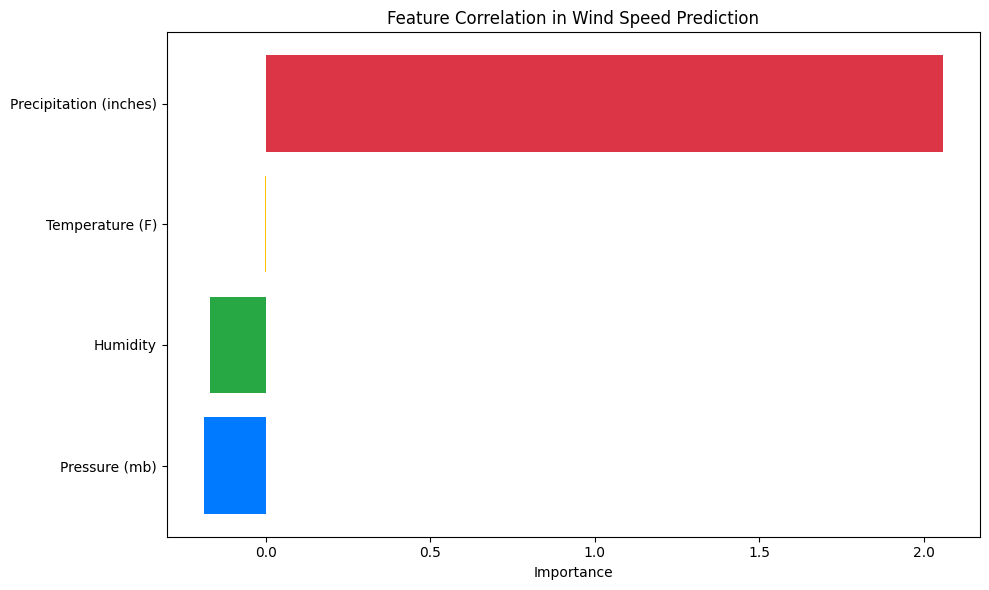

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your trained Linear Regression model in 'model'
# and your feature names in 'X.columns'

# Get feature importances (coefficients in Linear Regression)
importances = model.coef_
features = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)

# WECC color theme (adjust as needed)
wecc_colors = ['#007bff', '#28a745', '#ffc107', '#dc3545']

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color=wecc_colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.title('Feature Correlation in Wind Speed Prediction')
plt.tight_layout()
plt.show()